## Blobs in 2D Datasets Notebook

Testing my algorithms on 2D generated datasets with centers approaching together.

In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot

from bc_utils import TestDf

Creating datasets and saving them to pandas dataframes.

In [2]:
cluster_deviations = list(range(1, 10))
dataset_dfs = []
for std_deviation in cluster_deviations:
    X, y = make_blobs(n_samples=250, centers=2, cluster_std=std_deviation,
                      n_features=2)
    dataset_dfs.append(pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y)))

Showing plots of the datasets.

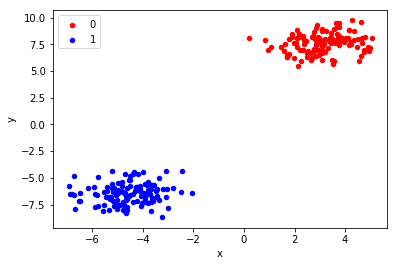

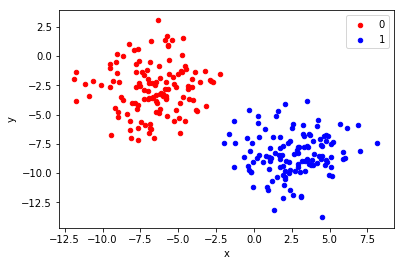

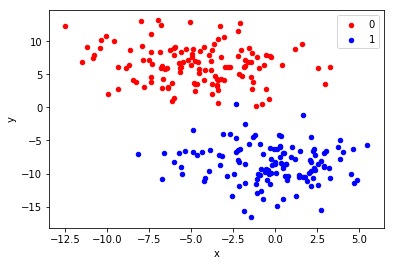

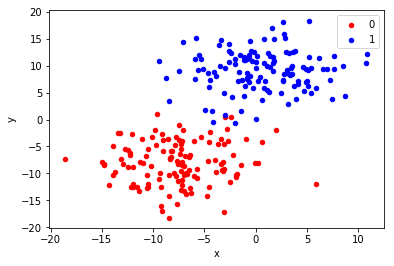

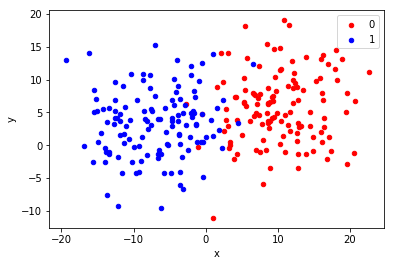

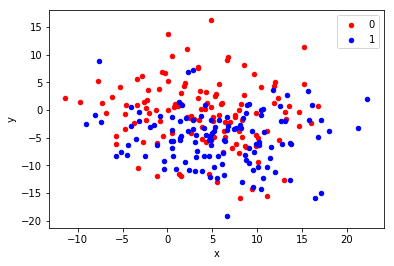

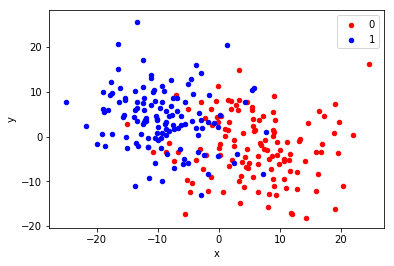

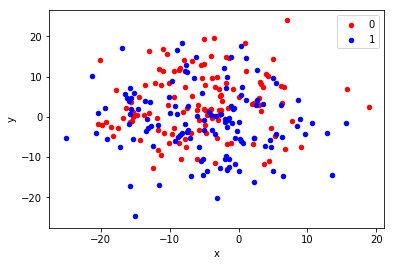

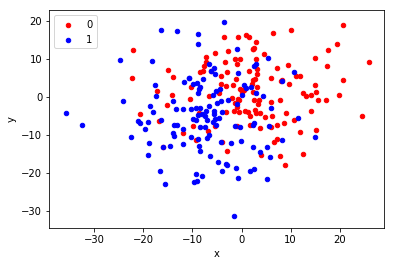

In [3]:
colors = {0:'red', 1:'blue'}
for df in dataset_dfs:
    fix, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y',
                   label=key, color=colors[key])
    pyplot.show()

Separating datasets to learn and test parts. Using own class TestDataset from utils.py

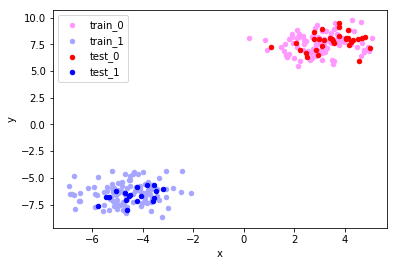

In [4]:
dataset = dataset_dfs[0]      

#creating dataset for testing algorithms
learning_dataset = TestDf(dataset)

learning_dataset.show_plot()

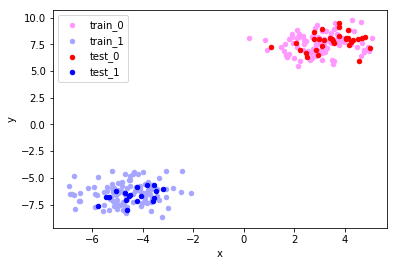

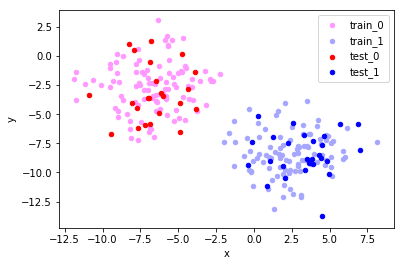

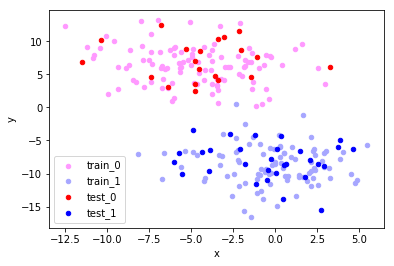

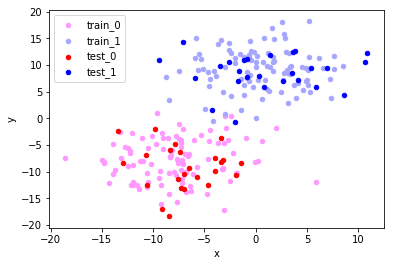

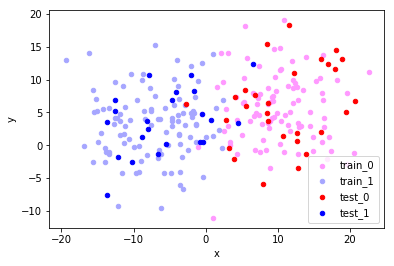

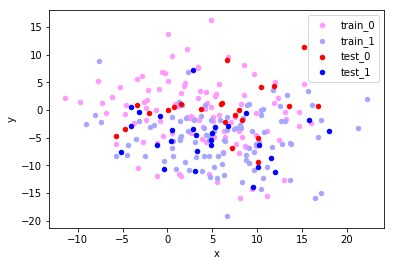

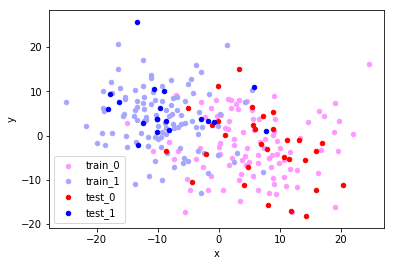

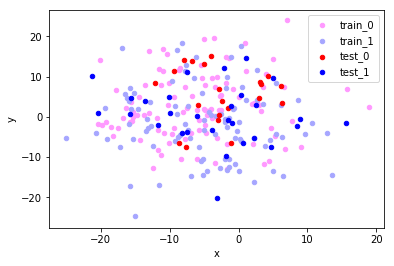

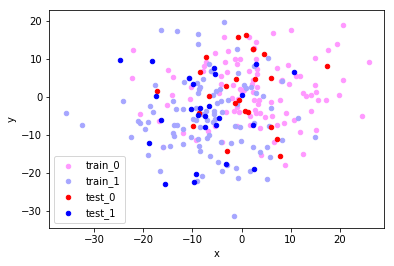

In [5]:
learning_datasets = []
for dataset in dataset_dfs:
    learning_datasets.append(TestDf(dataset))
    
for ldataset in learning_datasets:
    ldataset.show_plot()